# Packages

In [45]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# Data

In [107]:
results_path="~/GPU_vs_CPU_tests_of_competing_GBDTs_ml-gpu-py38-cuda101_cust_20200808.csv"

results_df=pd.read_csv(results_path)

results_df

,timestamp,algo,version,device,cpu_threads,nrows_train,ncols,total_items,num_iterations,learning_rate,wall_time_secs
0,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
1,2020-08-08 20:47:11.735,xgboost,1.2.0rc1,gpu,1,10000,10,100000,1000,0.1,3.054769
2,2020-08-08 20:47:17.764,lightgbm,3.0.0rc1,gpu,1,10000,100,1000000,1000,0.1,5.952390
3,2020-08-08 20:47:22.358,xgboost,1.2.0rc1,gpu,1,10000,100,1000000,1000,0.1,4.591197
4,2020-08-08 20:47:08.676,lightgbm,3.0.0rc1,gpu,1,10000,10,100000,1000,0.1,2.082741
...,...,...,...,...,...,...,...,...,...,...,...
55811,2020-08-10 07:11:11.133,xgboost,1.2.0rc1,cpu,4,100000,100,10000000,1000,0.1,29.293015
55812,2020-08-10 07:13:01.594,lightgbm,3.0.0rc1,cpu,4,100000,1000,100000000,1000,0.1,106.430452
55813,2020-08-10 07:16:50.197,xgboost,1.2.0rc1,cpu,4,100000,1000,100000000,1000,0.1,228.595835
55814,2020-08-10 07:17:06.981,lightgbm,3.0.0rc1,cpu,4,1000000,10,10000000,1000,0.1,16.431055


# Features

In [108]:
# insert the data_shape feature (as total_items masks 
# different impact of width and height on performance)
results_df['data_shape']=results_df['nrows_train'].astype(str) + '_x_' + results_df['ncols'].astype(str)
results_df['data_shape'].value_counts()


10000_x_10       5904
10000_x_100      5826
10000_x_1000     5750
10000_x_10000    5680
100000_x_10      5612
100000_x_100     5544
100000_x_1000    5476
1000000_x_10     5408
1000000_x_100    5340
10000000_x_10    5276
Name: data_shape, dtype: int64

In [109]:
# insert the algo_device feature (for measuring
# the differences in implementation efficiency 
# for various algos separately in each device)
results_df['algo_device']=results_df['algo'].astype(str) + '_' + results_df['device'].astype(str)
results_df['algo_device'].value_counts()


lightgbm_cpu    22562
xgboost_cpu     22562
xgboost_gpu      5346
lightgbm_gpu     5346
Name: algo_device, dtype: int64

In [111]:
# insert the algo_device_cores feature (for measuring
# the differences in implementation efficiency 
# for various algos separately in each device 
# and measuring the impact on performance
# of the number of CPU cores)
results_df['algo_device_cores']=results_df['algo'].astype(str) + '_' + \
                                results_df['device'].astype(str) + '_' + \
                                results_df['cpu_threads'].astype(str) + '_cores'
results_df['algo_device_cores'].value_counts()


xgboost_gpu_1_cores      5346
lightgbm_gpu_1_cores     5346
lightgbm_cpu_4_cores     5176
xgboost_cpu_4_cores      5176
xgboost_cpu_8_cores      4740
lightgbm_cpu_8_cores     4740
xgboost_cpu_16_cores     4425
lightgbm_cpu_16_cores    4425
xgboost_cpu_32_cores     3940
lightgbm_cpu_32_cores    3940
xgboost_cpu_64_cores     3540
lightgbm_cpu_64_cores    3540
lightgbm_cpu_1_cores      741
xgboost_cpu_1_cores       741
Name: algo_device_cores, dtype: int64

# Analysis

In [113]:
# get distributions of compute times
# for all combinations of device, algo, and total_items

devices=list(results_df['device'].value_counts().index)
algos=list(results_df['algo'].value_counts().index)
total_items_list=list(results_df['total_items'].value_counts().index)
data_shapes_list=list(results_df['data_shape'].value_counts().index)
algo_devices_list=list(results_df['algo_device'].value_counts().index)
algo_devices_cores_list=list(results_df['algo_device_cores'].value_counts().index)

for data_shape in data_shapes_list:
 
    for algo_device_cores in algo_devices_cores_list:

        query='data_shape == "%s" & algo_device_cores == "%s"' % (data_shape, algo_device_cores)

        print("\n",query,":")
        print(results_df.query(query)['wall_time_secs'].describe())



 data_shape == "10000_x_10" & algo_device_cores == "xgboost_gpu_1_cores" :
count    579.000000
mean       3.107201
std        0.043163
min        3.054769
25%        3.069570
50%        3.100283
75%        3.127380
max        3.587084
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "lightgbm_gpu_1_cores" :
count    579.000000
mean       2.061698
std        0.028923
min        2.029619
25%        2.033524
50%        2.063832
75%        2.066030
max        2.252204
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "lightgbm_cpu_4_cores" :
count    540.000000
mean       1.370781
std        0.039093
min        1.298513
25%        1.343349
50%        1.365905
75%        1.365905
max        1.444491
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_10" & algo_device_cores == "xgboost_cpu_4_cores" :
count    540.000000
mean       2.689642
std        0.043493
min        2.651273
25%        2.651273
50%

count    530.000000
mean      45.788927
std        1.567647
min       43.828582
25%       43.828582
50%       46.933549
75%       47.052945
max       47.281299
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_1000" & algo_device_cores == "xgboost_cpu_8_cores" :
count    484.000000
mean      30.614978
std        0.698764
min       29.788868
25%       29.788868
50%       30.976618
75%       31.370279
max       31.370279
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_1000" & algo_device_cores == "lightgbm_cpu_8_cores" :
count    484.000000
mean      10.587950
std        0.096615
min       10.494027
25%       10.494027
50%       10.557782
75%       10.692797
max       10.795780
Name: wall_time_secs, dtype: float64

 data_shape == "10000_x_1000" & algo_device_cores == "xgboost_cpu_16_cores" :
count    455.000000
mean      25.625136
std        0.100000
min       25.474512
25%       25.588586
50%       25.636580
75%       25.667061
max       26.071948
Name: wall_ti

count    356.000000
mean       5.375378
std        0.514593
min        4.612230
25%        5.182447
50%        5.182447
75%        5.999347
max        6.043206
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_10" & algo_device_cores == "lightgbm_cpu_1_cores" :
count    76.000000
mean      6.168392
std       0.192830
min       5.932252
25%       6.028652
50%       6.041868
75%       6.377597
max       6.377597
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_10" & algo_device_cores == "xgboost_cpu_1_cores" :
count    76.000000
mean     33.738435
std       0.576965
min      33.151555
25%      33.256021
50%      33.270261
75%      34.374024
max      34.374024
Name: wall_time_secs, dtype: float64

 data_shape == "100000_x_100" & algo_device_cores == "xgboost_gpu_1_cores" :
count    529.000000
mean       6.646055
std        0.025856
min        6.619263
25%        6.623386
50%        6.640409
75%        6.653238
max        6.703202
Name: wall_time_secs, dtype: flo

count    464.000000
mean       9.711316
std        0.555650
min        9.109375
25%        9.109375
50%        9.798050
75%       10.424926
max       10.424926
Name: wall_time_secs, dtype: float64

 data_shape == "1000000_x_10" & algo_device_cores == "xgboost_cpu_16_cores" :
count    430.000000
mean      56.310184
std        0.394741
min       56.080077
25%       56.080077
50%       56.318497
75%       56.318497
max       59.326089
Name: wall_time_secs, dtype: float64

 data_shape == "1000000_x_10" & algo_device_cores == "lightgbm_cpu_16_cores" :
count    430.000000
mean       7.434033
std        0.248943
min        6.712247
25%        7.276657
50%        7.586220
75%        7.590881
max        7.813205
Name: wall_time_secs, dtype: float64

 data_shape == "1000000_x_10" & algo_device_cores == "xgboost_cpu_32_cores" :
count    384.000000
mean      78.052505
std        2.955914
min       74.795825
25%       74.795825
50%       79.870935
75%       80.958366
max       81.679872
Name: wall_

count     336.000000
mean      997.969320
std       302.165925
min       344.758467
25%      1126.661555
50%      1126.661555
75%      1147.100814
max      1147.100814
Name: wall_time_secs, dtype: float64

 data_shape == "10000000_x_10" & algo_device_cores == "lightgbm_cpu_1_cores" :
count     57.000000
mean     458.817889
std        2.593802
min      456.299940
25%      456.299940
50%      456.299940
75%      461.221484
max      461.857027
Name: wall_time_secs, dtype: float64

 data_shape == "10000000_x_10" & algo_device_cores == "xgboost_cpu_1_cores" :
count      57.000000
mean     3633.065952
std        18.563576
min      3615.843927
25%      3615.843927
50%      3615.843927
75%      3645.403109
max      3662.514033
Name: wall_time_secs, dtype: float64


# Plots

In [115]:
# do not plot measurements for 64-cores as outliers
outliers_threads_num=64
query='cpu_threads != "%s"' % (outliers_threads_num)        

plotted_results_df = results_df.query(query)
plotted_results_df['cpu_threads'].value_counts()


1     12174
4     10352
8      9480
16     8850
32     7880
Name: cpu_threads, dtype: int64

['algo_device', 'algo_device_cores']
1.343 1307.534


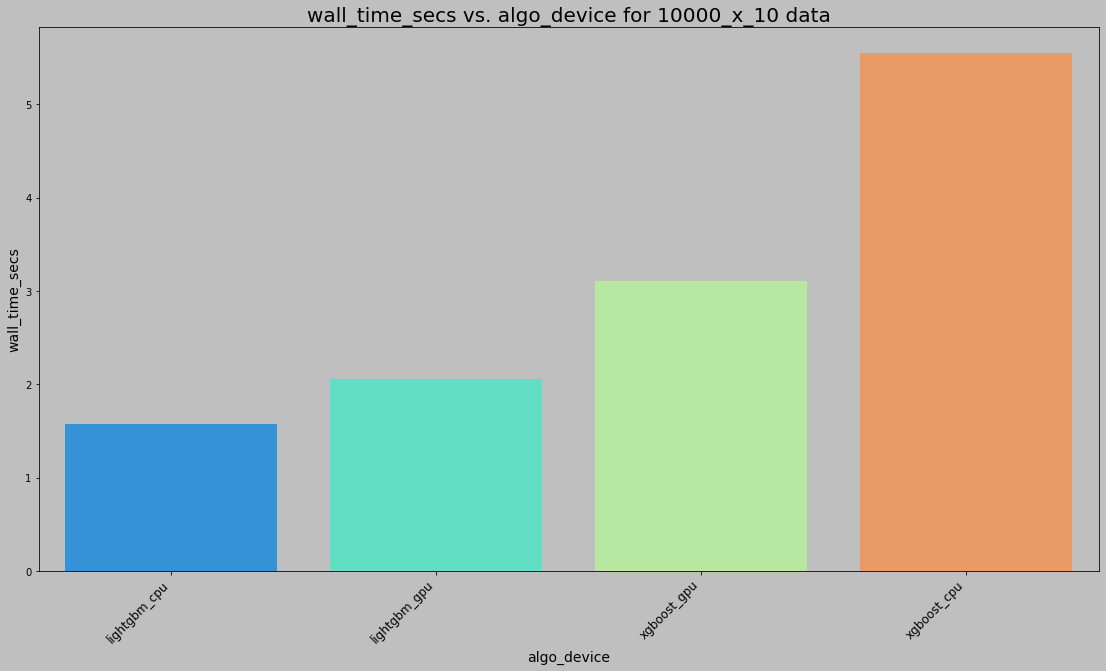

data_shape == "10000_x_10" :
             wall_time_secs
algo_device                
lightgbm_cpu           1.58
lightgbm_gpu           2.06
xgboost_gpu            3.11
xgboost_cpu            5.55





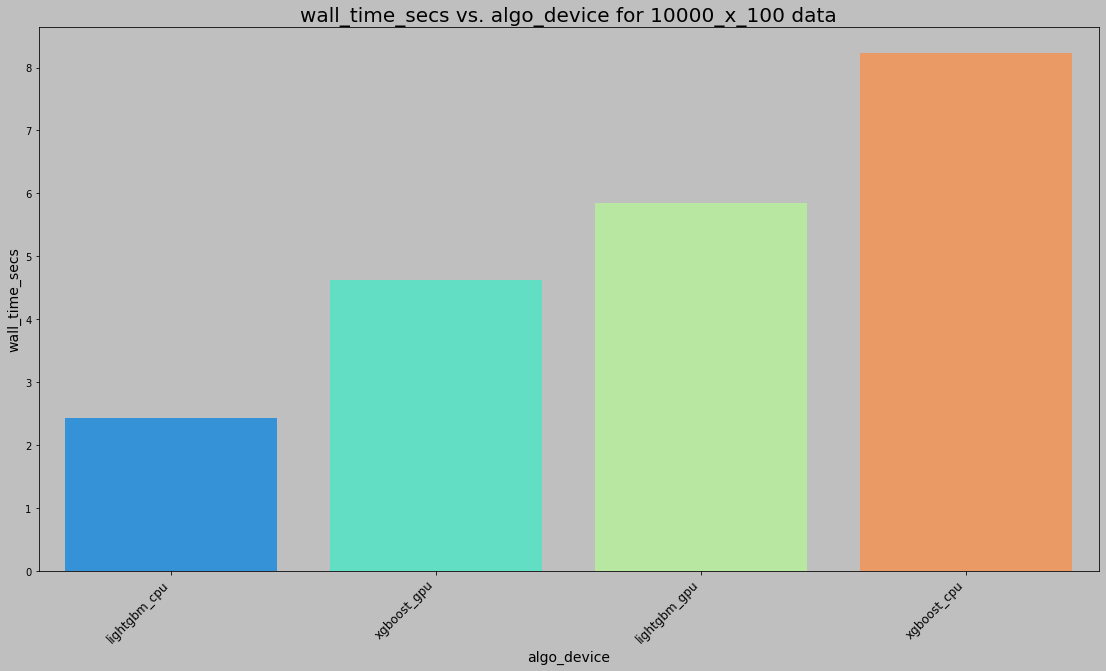

data_shape == "10000_x_100" :
             wall_time_secs
algo_device                
lightgbm_cpu           2.43
xgboost_gpu            4.63
lightgbm_gpu           5.85
xgboost_cpu            8.23





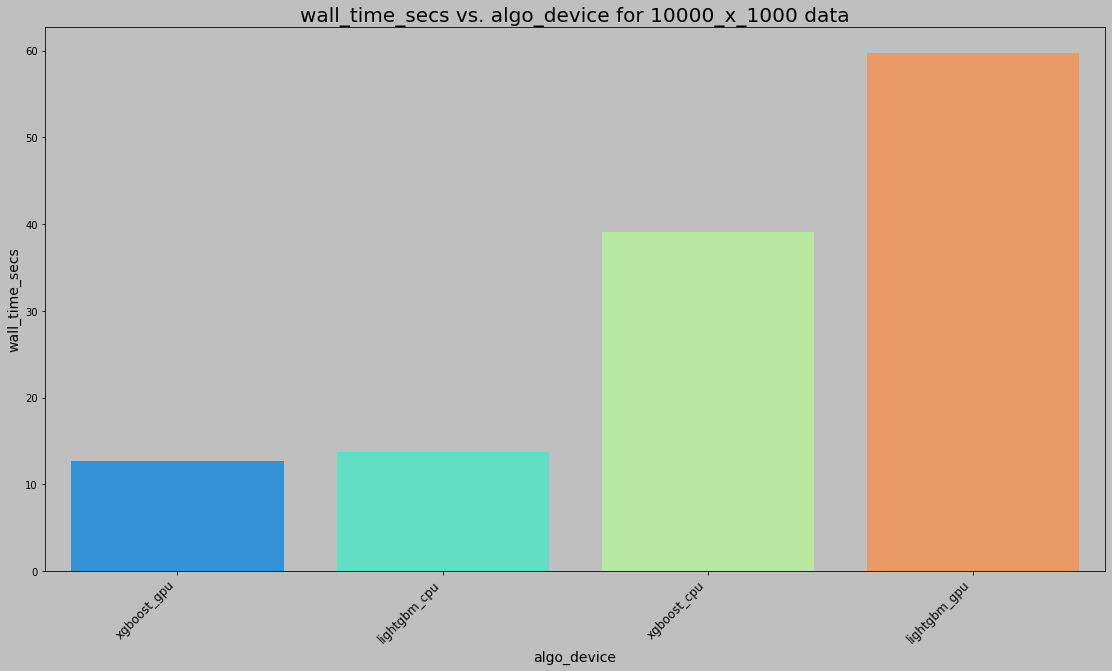

data_shape == "10000_x_1000" :
             wall_time_secs
algo_device                
xgboost_gpu           12.69
lightgbm_cpu          13.68
xgboost_cpu           39.12
lightgbm_gpu          59.70





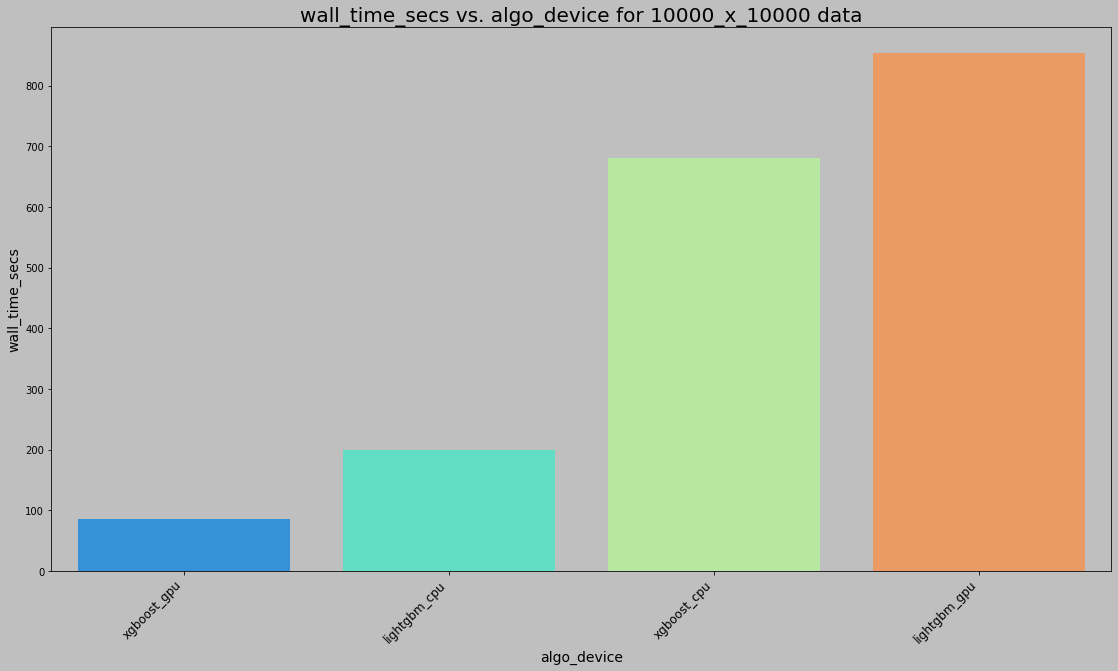

data_shape == "10000_x_10000" :
             wall_time_secs
algo_device                
xgboost_gpu           84.98
lightgbm_cpu         199.87
xgboost_cpu          680.56
lightgbm_gpu         853.23





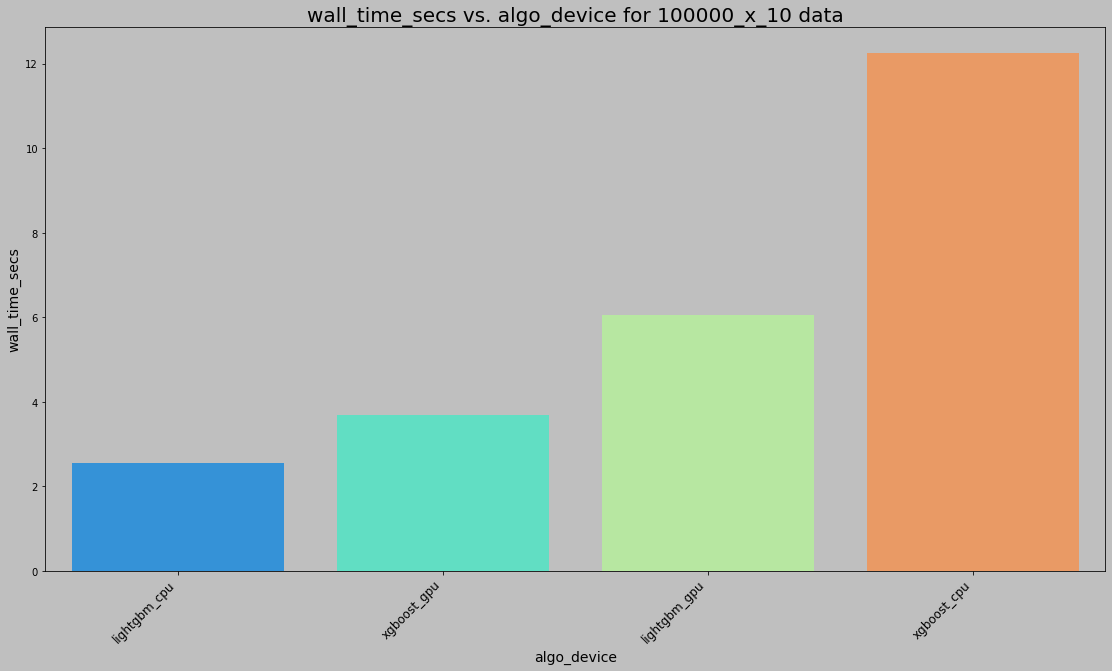

data_shape == "100000_x_10" :
             wall_time_secs
algo_device                
lightgbm_cpu           2.56
xgboost_gpu            3.70
lightgbm_gpu           6.07
xgboost_cpu           12.24





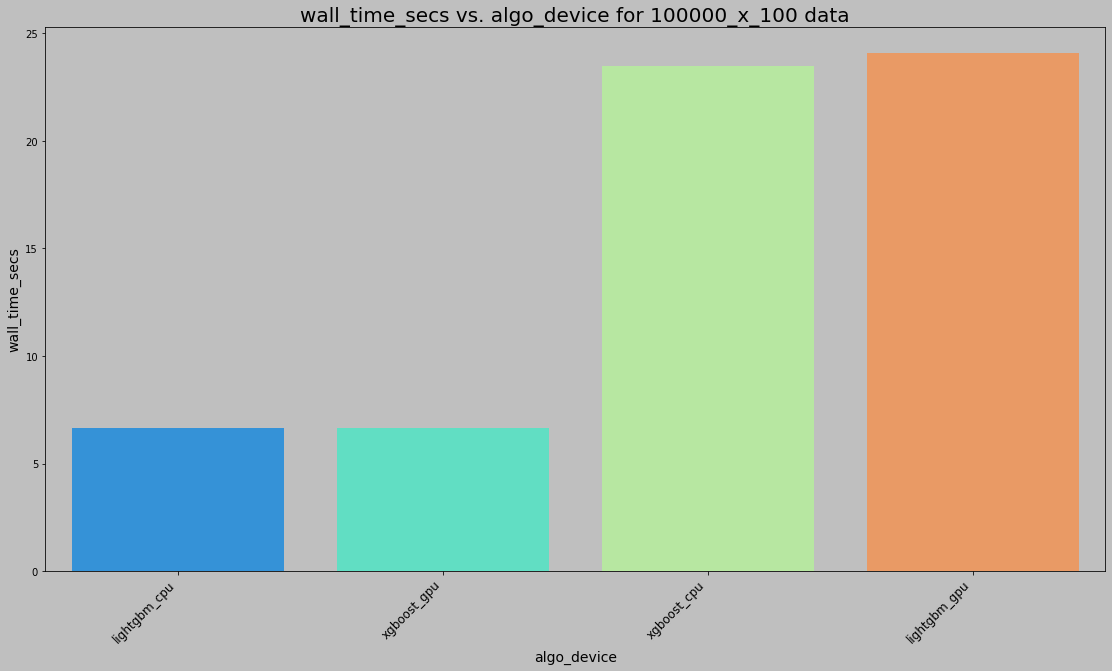

data_shape == "100000_x_100" :
             wall_time_secs
algo_device                
lightgbm_cpu           6.64
xgboost_gpu            6.65
xgboost_cpu           23.46
lightgbm_gpu          24.07





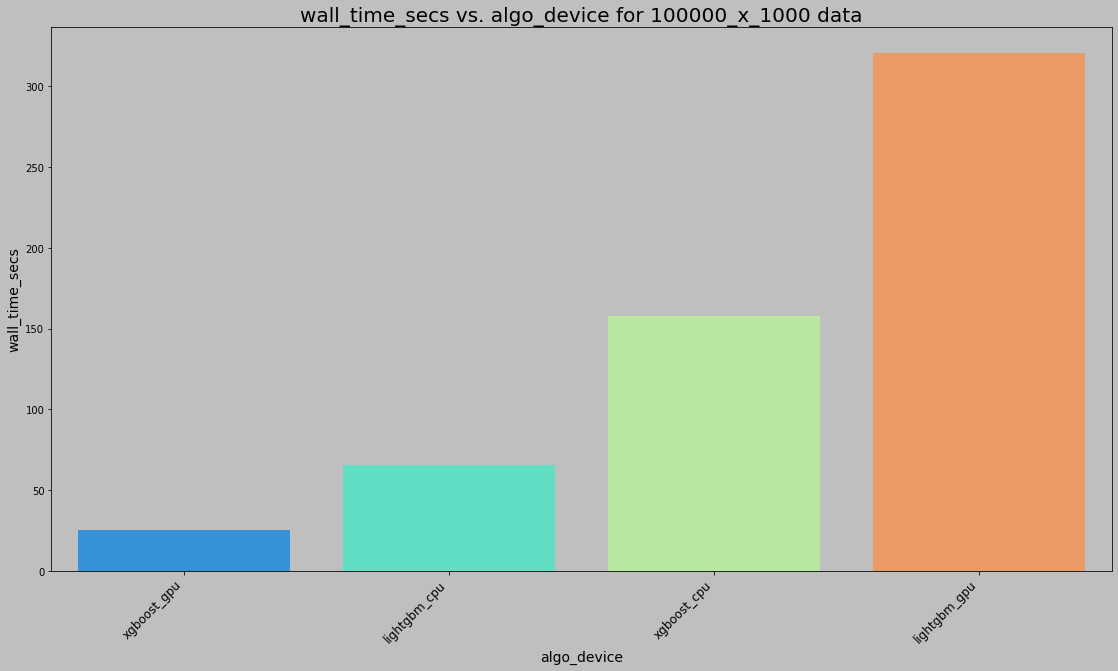

data_shape == "100000_x_1000" :
             wall_time_secs
algo_device                
xgboost_gpu           25.61
lightgbm_cpu          65.41
xgboost_cpu          157.69
lightgbm_gpu         320.35





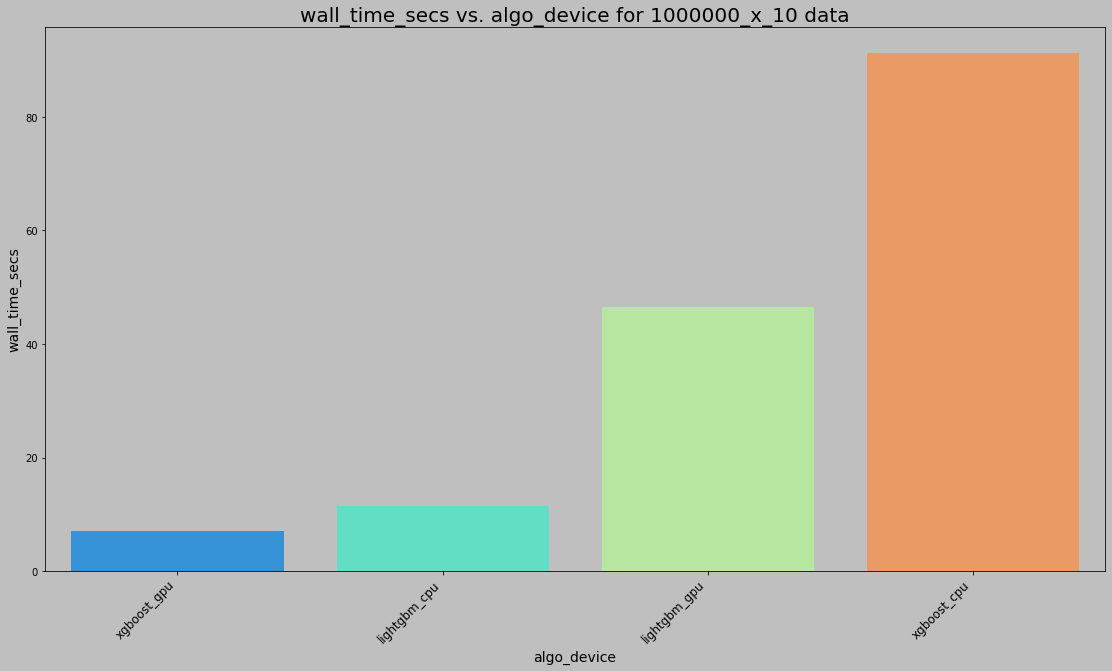

data_shape == "1000000_x_10" :
             wall_time_secs
algo_device                
xgboost_gpu            6.98
lightgbm_cpu          11.44
lightgbm_gpu          46.43
xgboost_cpu           91.21





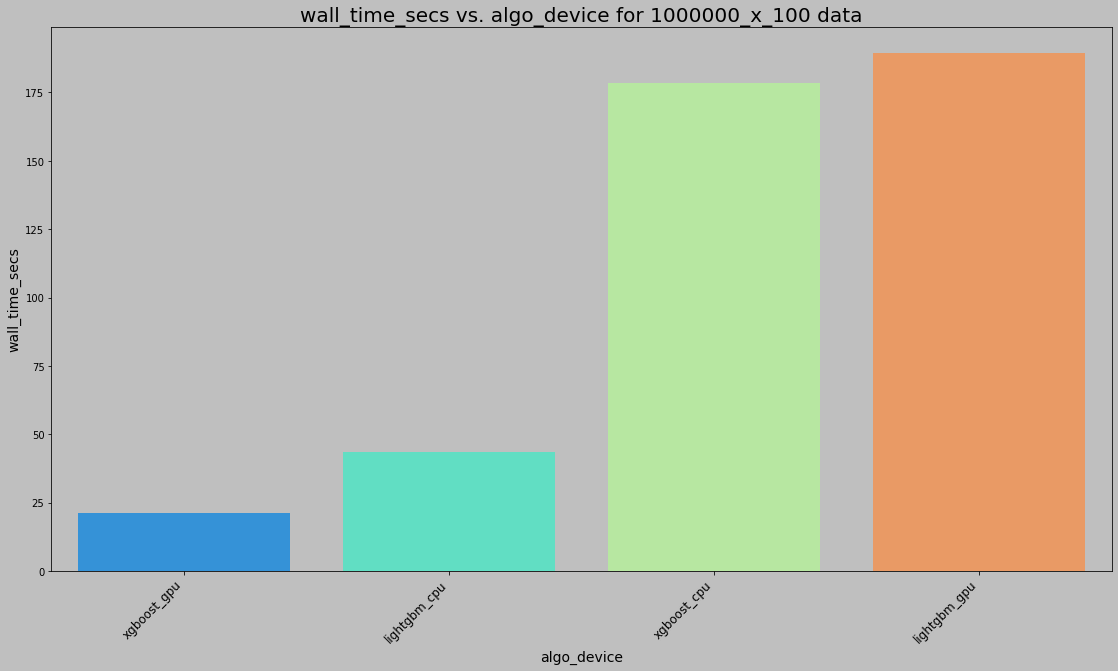

data_shape == "1000000_x_100" :
             wall_time_secs
algo_device                
xgboost_gpu           21.10
lightgbm_cpu          43.57
xgboost_cpu          178.29
lightgbm_gpu         189.31





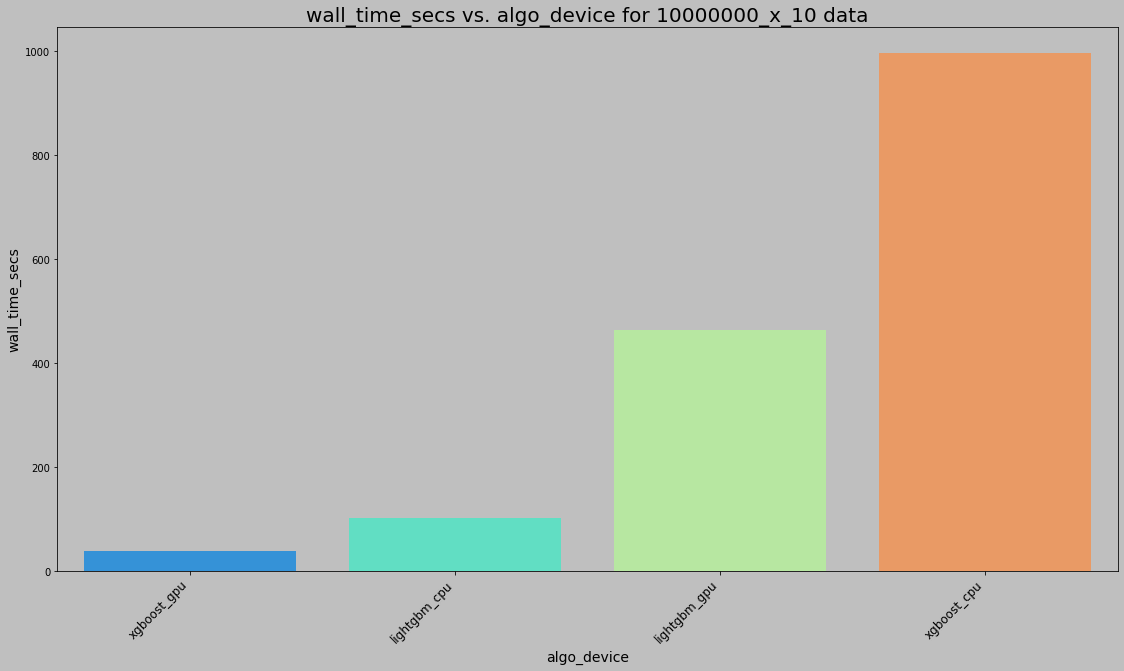

data_shape == "10000000_x_10" :
             wall_time_secs
algo_device                
xgboost_gpu           39.44
lightgbm_cpu         102.63
lightgbm_gpu         464.01
xgboost_cpu          995.49





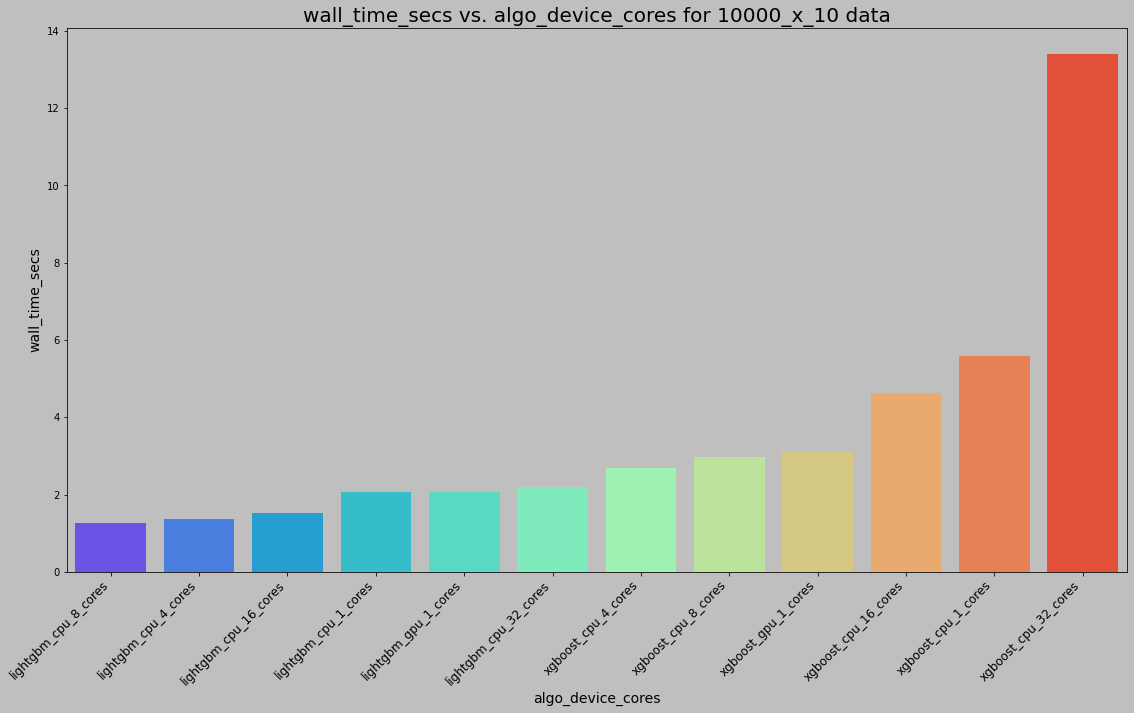

data_shape == "10000_x_10" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_8_cores            1.26
lightgbm_cpu_4_cores            1.37
lightgbm_cpu_16_cores           1.51
lightgbm_cpu_1_cores            2.06
lightgbm_gpu_1_cores            2.06
lightgbm_cpu_32_cores           2.20
xgboost_cpu_4_cores             2.69
xgboost_cpu_8_cores             2.97
xgboost_gpu_1_cores             3.11
xgboost_cpu_16_cores            4.63
xgboost_cpu_1_cores             5.60
xgboost_cpu_32_cores           13.40





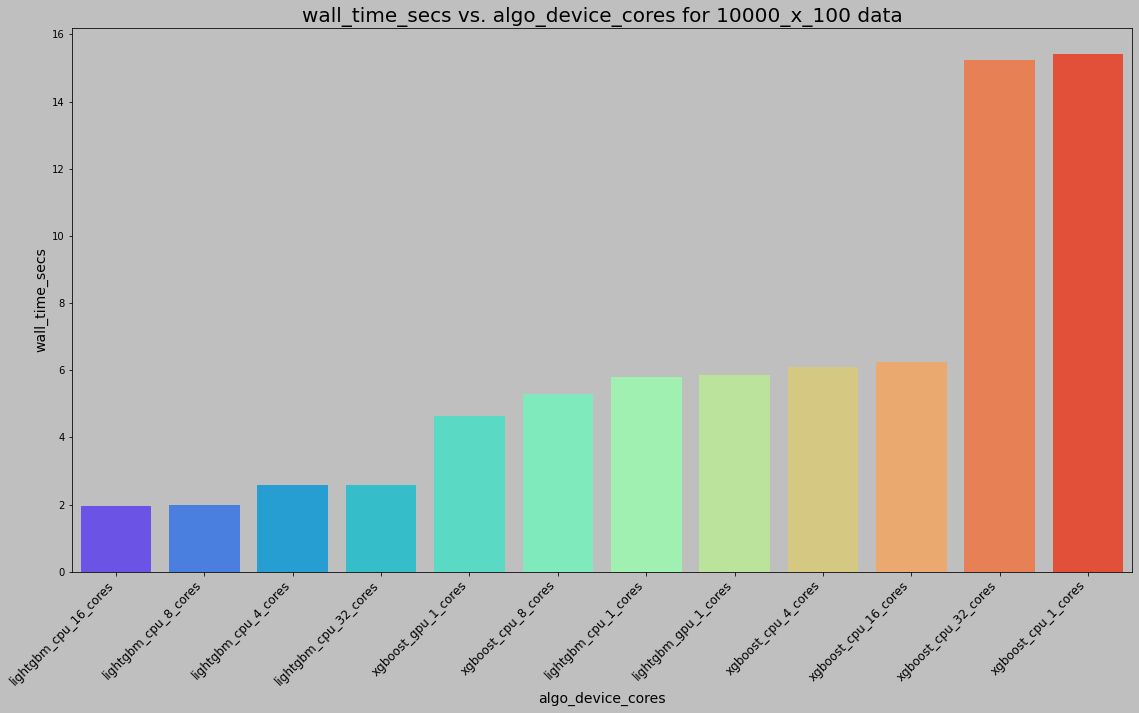

data_shape == "10000_x_100" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_16_cores           1.95
lightgbm_cpu_8_cores            1.99
lightgbm_cpu_4_cores            2.58
lightgbm_cpu_32_cores           2.59
xgboost_gpu_1_cores             4.63
xgboost_cpu_8_cores             5.30
lightgbm_cpu_1_cores            5.79
lightgbm_gpu_1_cores            5.85
xgboost_cpu_4_cores             6.08
xgboost_cpu_16_cores            6.23
xgboost_cpu_32_cores           15.23
xgboost_cpu_1_cores            15.41





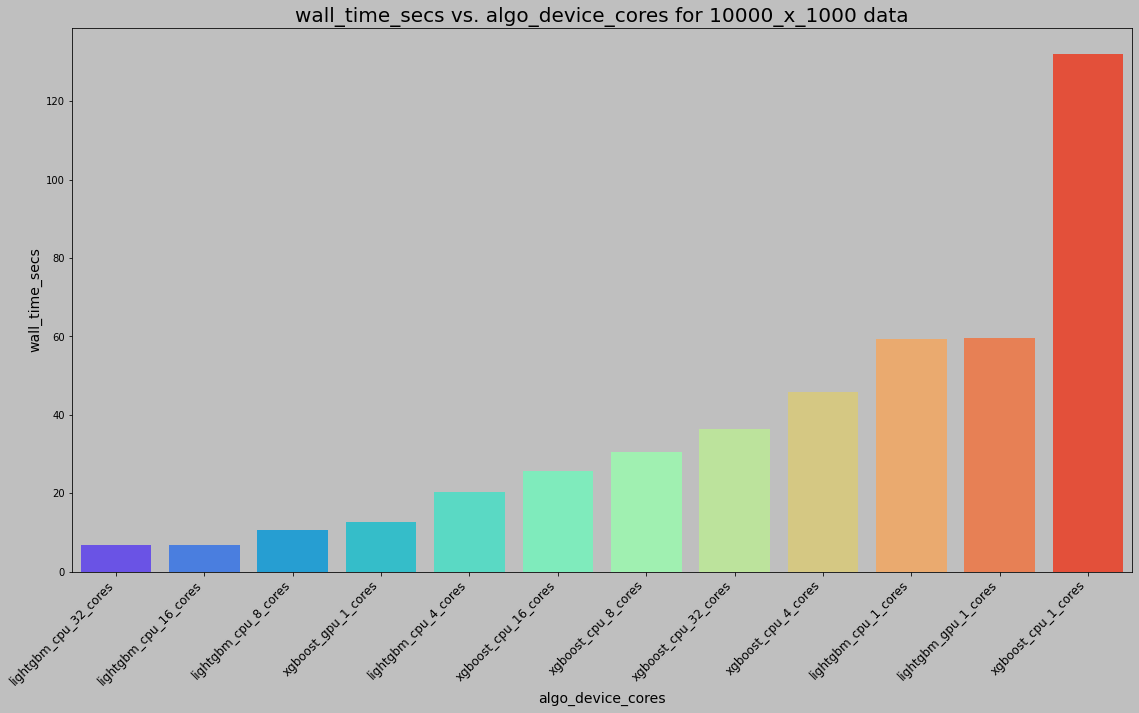

data_shape == "10000_x_1000" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_32_cores           6.75
lightgbm_cpu_16_cores           6.89
lightgbm_cpu_8_cores           10.59
xgboost_gpu_1_cores            12.69
lightgbm_cpu_4_cores           20.37
xgboost_cpu_16_cores           25.63
xgboost_cpu_8_cores            30.61
xgboost_cpu_32_cores           36.44
xgboost_cpu_4_cores            45.79
lightgbm_cpu_1_cores           59.48
lightgbm_gpu_1_cores           59.70
xgboost_cpu_1_cores           132.02





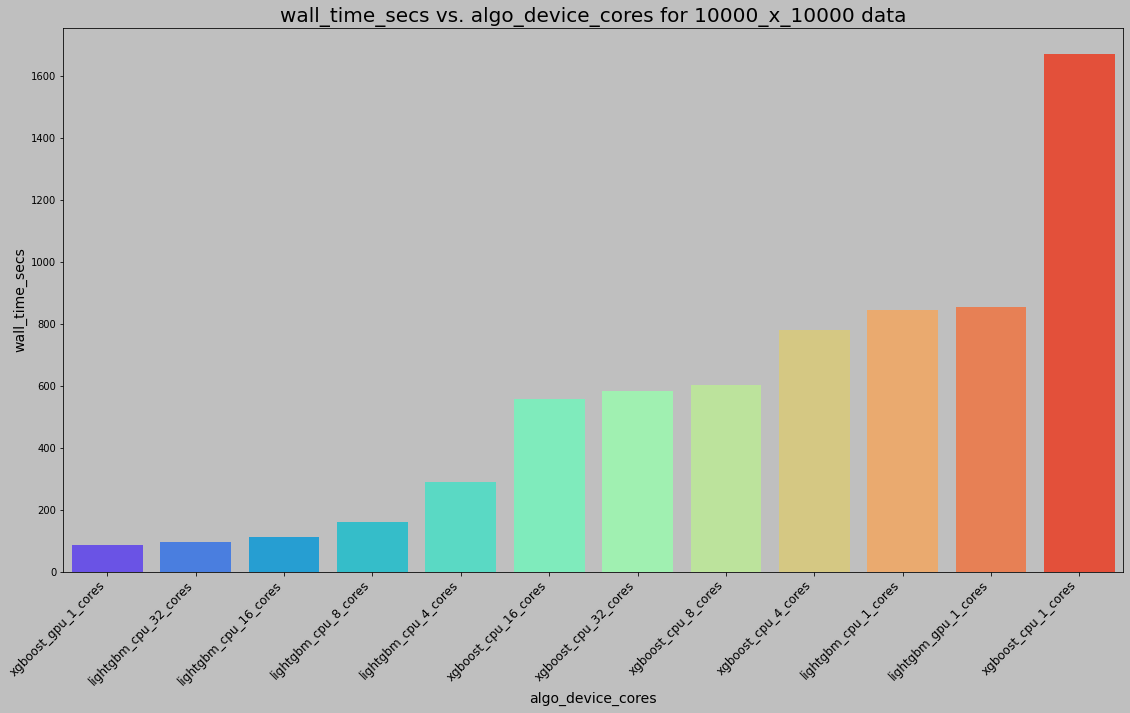

data_shape == "10000_x_10000" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            84.98
lightgbm_cpu_32_cores          97.42
lightgbm_cpu_16_cores         113.16
lightgbm_cpu_8_cores          160.83
lightgbm_cpu_4_cores          289.49
xgboost_cpu_16_cores          558.40
xgboost_cpu_32_cores          582.32
xgboost_cpu_8_cores           604.22
xgboost_cpu_4_cores           779.05
lightgbm_cpu_1_cores          845.97
lightgbm_gpu_1_cores          853.23
xgboost_cpu_1_cores          1670.55





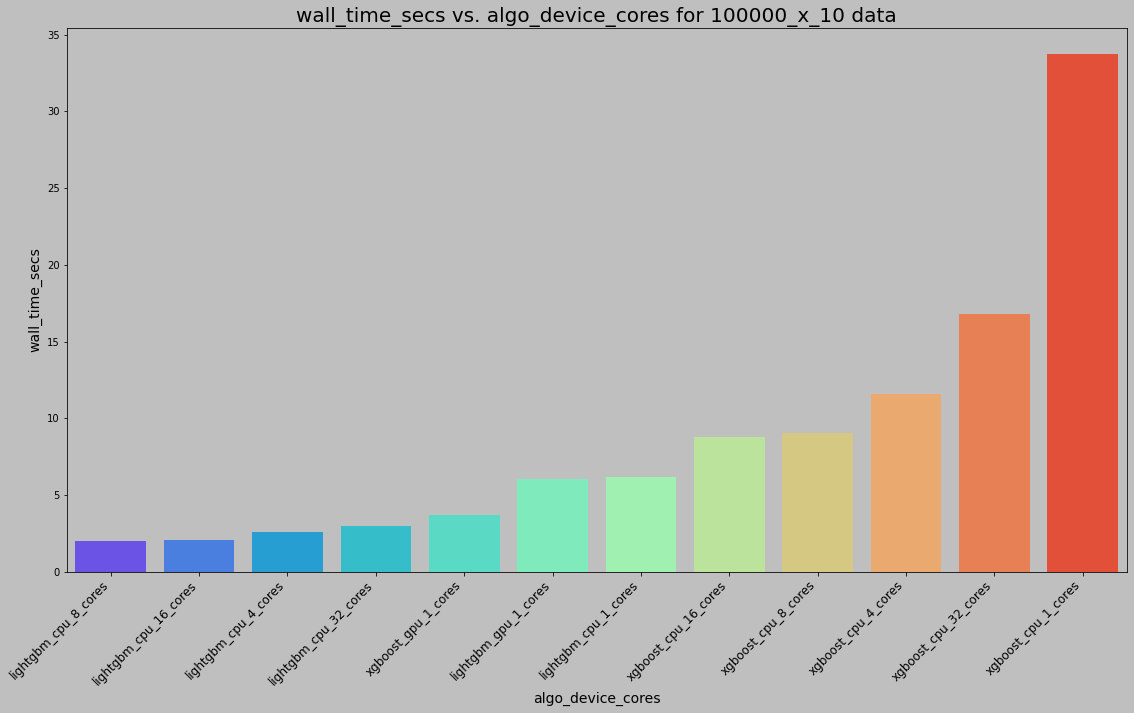

data_shape == "100000_x_10" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_8_cores            1.99
lightgbm_cpu_16_cores           2.10
lightgbm_cpu_4_cores            2.62
lightgbm_cpu_32_cores           2.96
xgboost_gpu_1_cores             3.70
lightgbm_gpu_1_cores            6.07
lightgbm_cpu_1_cores            6.17
xgboost_cpu_16_cores            8.75
xgboost_cpu_8_cores             9.03
xgboost_cpu_4_cores            11.57
xgboost_cpu_32_cores           16.79
xgboost_cpu_1_cores            33.74





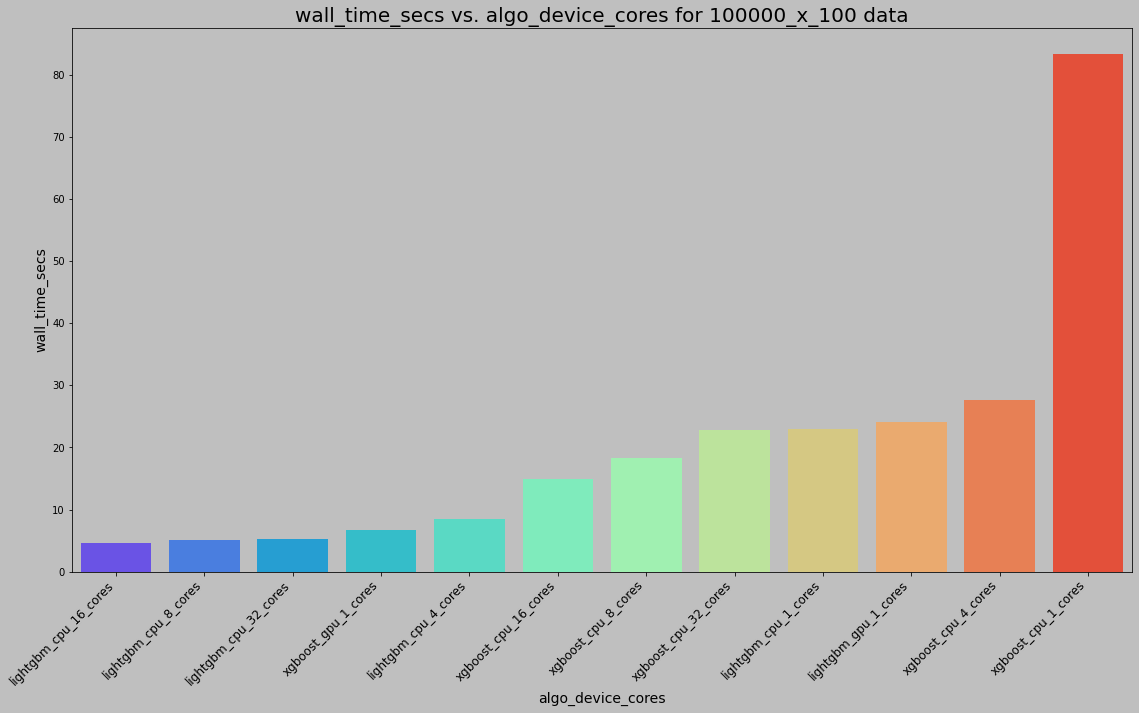

data_shape == "100000_x_100" :
                      wall_time_secs
algo_device_cores                   
lightgbm_cpu_16_cores           4.68
lightgbm_cpu_8_cores            5.12
lightgbm_cpu_32_cores           5.31
xgboost_gpu_1_cores             6.65
lightgbm_cpu_4_cores            8.46
xgboost_cpu_16_cores           15.01
xgboost_cpu_8_cores            18.29
xgboost_cpu_32_cores           22.75
lightgbm_cpu_1_cores           22.91
lightgbm_gpu_1_cores           24.07
xgboost_cpu_4_cores            27.60
xgboost_cpu_1_cores            83.32





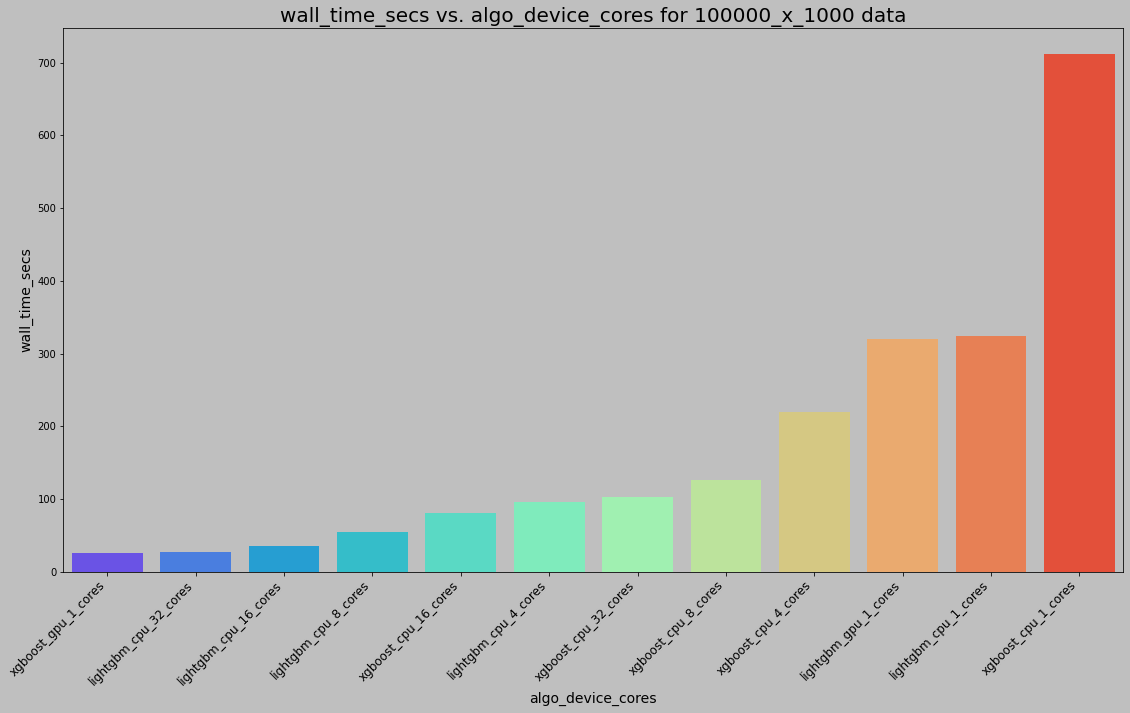

data_shape == "100000_x_1000" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            25.61
lightgbm_cpu_32_cores          27.35
lightgbm_cpu_16_cores          34.84
lightgbm_cpu_8_cores           54.63
xgboost_cpu_16_cores           80.39
lightgbm_cpu_4_cores           95.92
xgboost_cpu_32_cores          102.34
xgboost_cpu_8_cores           126.65
xgboost_cpu_4_cores           220.32
lightgbm_gpu_1_cores          320.35
lightgbm_cpu_1_cores          323.64
xgboost_cpu_1_cores           711.93





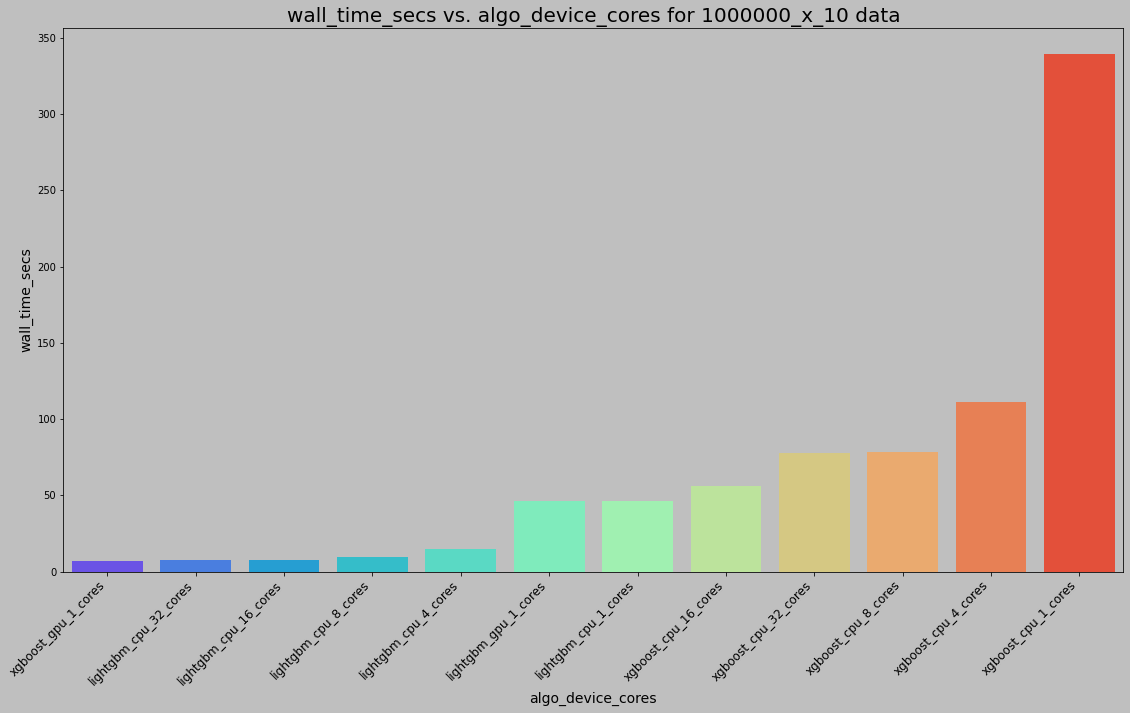

data_shape == "1000000_x_10" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores             6.98
lightgbm_cpu_32_cores           7.43
lightgbm_cpu_16_cores           7.43
lightgbm_cpu_8_cores            9.71
lightgbm_cpu_4_cores           15.02
lightgbm_gpu_1_cores           46.43
lightgbm_cpu_1_cores           46.65
xgboost_cpu_16_cores           56.31
xgboost_cpu_32_cores           78.05
xgboost_cpu_8_cores            78.75
xgboost_cpu_4_cores           110.96
xgboost_cpu_1_cores           339.23





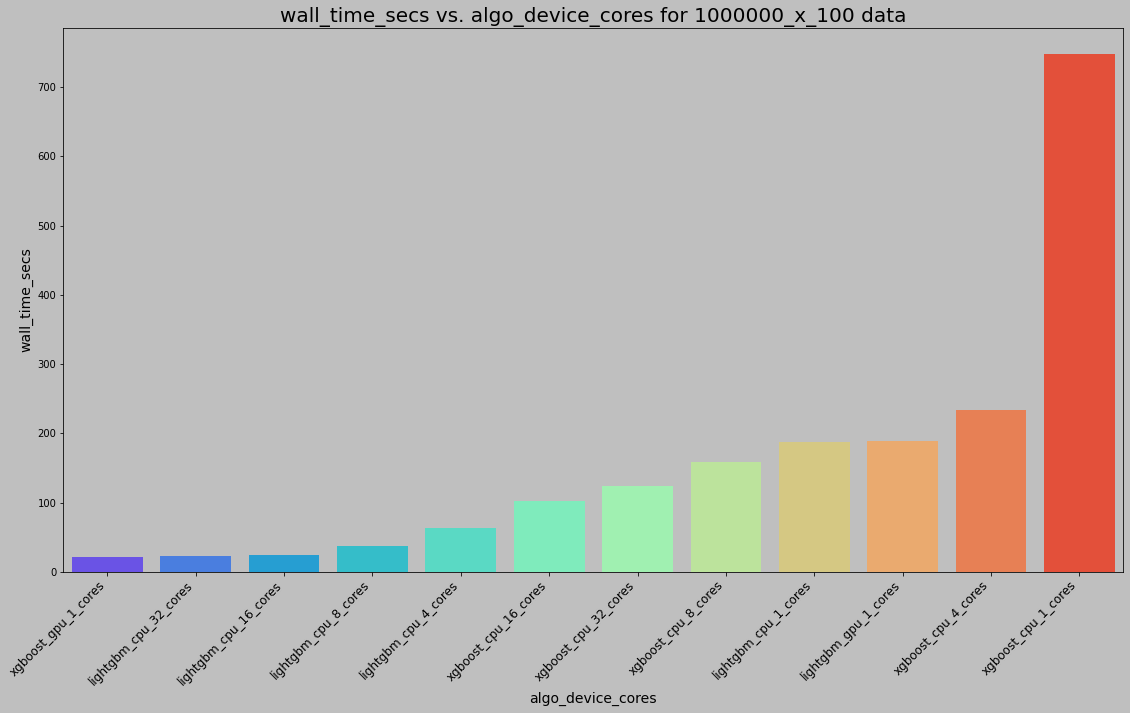

data_shape == "1000000_x_100" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            21.10
lightgbm_cpu_32_cores          22.51
lightgbm_cpu_16_cores          24.91
lightgbm_cpu_8_cores           37.81
lightgbm_cpu_4_cores           63.49
xgboost_cpu_16_cores          101.99
xgboost_cpu_32_cores          123.94
xgboost_cpu_8_cores           158.55
lightgbm_cpu_1_cores          187.31
lightgbm_gpu_1_cores          189.31
xgboost_cpu_4_cores           234.29
xgboost_cpu_1_cores           747.68





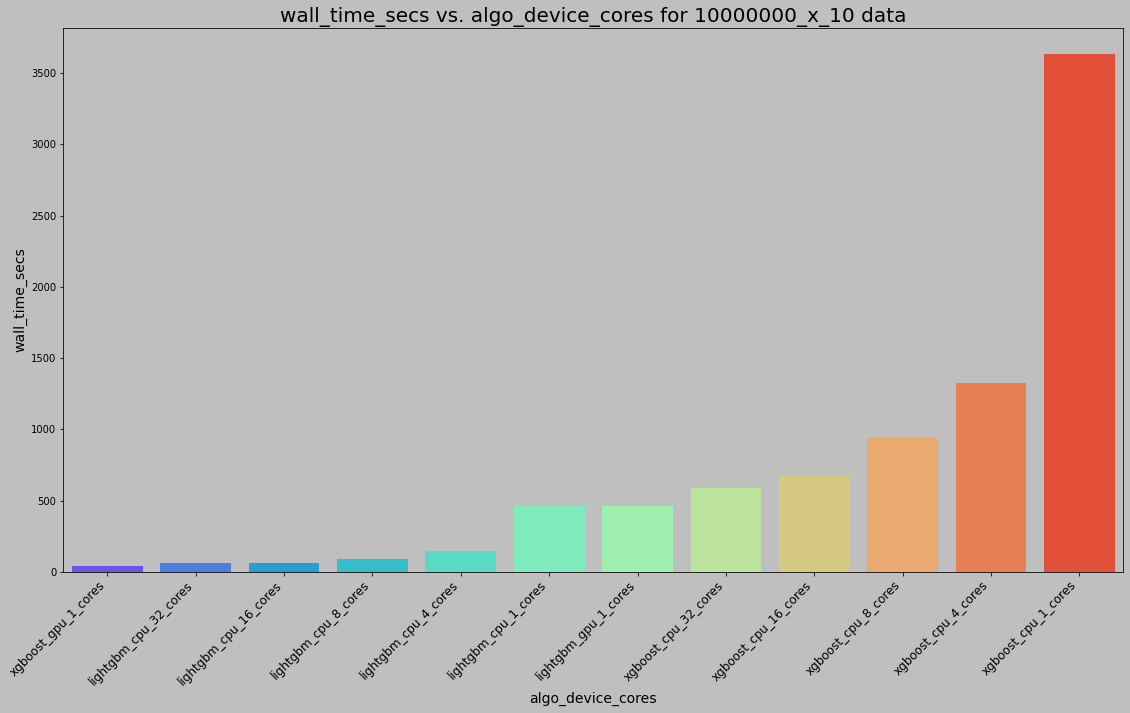

data_shape == "10000000_x_10" :
                      wall_time_secs
algo_device_cores                   
xgboost_gpu_1_cores            39.44
lightgbm_cpu_32_cores          58.18
lightgbm_cpu_16_cores          58.36
lightgbm_cpu_8_cores           89.00
lightgbm_cpu_4_cores          145.42
lightgbm_cpu_1_cores          458.82
lightgbm_gpu_1_cores          464.01
xgboost_cpu_32_cores          590.41
xgboost_cpu_16_cores          671.20
xgboost_cpu_8_cores           939.05
xgboost_cpu_4_cores          1325.92
xgboost_cpu_1_cores          3633.07





In [188]:
# plot compute times grouped by each combination
# of device, algo, and total_items

# define results (accuracy metric) col
results_col='wall_time_secs'

# define ignored (not optimized) columns
non_params=[results_col, 'timestamp', 'cpu_threads', 'total_items', 'data_shape', 'nrows_train', 'ncols', 
            'num_iterations', 'learning_rate', 'algo', 'version', 'device']

params_cols=list(plotted_results_df.columns)

params_cols = list(set(params_cols) - set(non_params))
print(params_cols)

use_common_range=False
# establish common parameters range
# (in terms of percentiles)
# note: means have narrower 
# ranges than individual models
min_perc_to_plot = 1
max_perc_to_plot = 99
results_min, results_max = np.round(np.percentile(plotted_results_df[results_col], [min_perc_to_plot, max_perc_to_plot]), 3)
print(results_min, results_max)


for param in params_cols:

    for data_shape in data_shapes_list:

        # narrow down the data subset for comparability
        # query='device == "%s" & algo == "%s" & data_shape == "%s"' % (device, algo, data_shape)            
        query='data_shape == "%s"' % (data_shape)        

        # group results values by the levels of the current parameter
        results_by_param = plotted_results_df.query(query).groupby(param).mean()[results_col]
        # sort query results by results col (asc left to right)
        results_by_param = results_by_param.sort_values(ascending=True, inplace=False)
        
        # define font color as an universally 
        # visible font color (even on dark backgrounds)
        font_color='black'
        # font_color='darkgreen'
        # define plot canvass color 
        # with less eye-strain than white
        plot_color=(0.75, 0.75, 0.75) # silver
        
        plt.figure(figsize=(19,10), facecolor=plot_color) # 1900x1000
                
        ax = sns.barplot(x=results_by_param.index,
                     y=results_by_param, 
                     alpha=1.0, palette="rainbow")
        ax.set_facecolor(plot_color)

        if use_common_range:
            # set common y axis range
            ax.set_ylim([results_min, results_max])
            
        # set label names
        plt.xlabel(param, fontsize=14, color=font_color)
        plt.ylabel(results_col, fontsize=14, color=font_color)
        
        # rotate x-axis labels to make them fit
        plt.xticks(rotation=45, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='large', color=font_color)
        
        # total_items_log = np.log(total_items)
        plt.title("%s vs. %s for %s data" % (results_col, param, data_shape), fontsize=20, color=font_color)

        plt.show();

        print(query,":")
        print(pd.DataFrame(results_by_param).applymap("{0:.2f}".format))

        print("\n\n")
